# How to compare a model to a baseline

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import KNN
from sklearn.neighbors import KNeighborsClassifier
# import dummy classifier
from sklearn.dummy import DummyClassifier
# import accuracy score
from sklearn.metrics import accuracy_score

# import roc_auc_score
from sklearn.metrics import roc_auc_score

In [37]:
# load the source/diabetes.csv as a dataframe
df = pd.read_csv('source/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# split the data into features and target: Target is the Outcome column
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [39]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# create a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the test data
y_pred = knn.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.7077922077922078


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


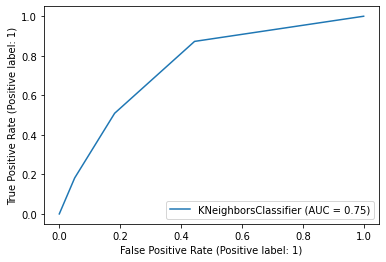

ROC AUC: 0.6636363636363636


In [42]:
#  plot the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn, X_test, y_test)
plt.show()
# calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC:', roc_auc)


In [43]:
# create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# fit the dummy classifier to the training data
dummy.fit(X_train, y_train)

# make predictions on the test data
y_pred = dummy.predict(X_test)

# calculate the accuracy of the dummy classifier
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.6428571428571429


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


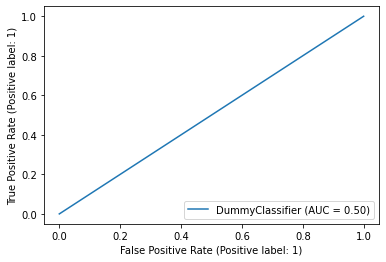

ROC AUC: 0.5


In [44]:
plot_roc_curve(dummy, X_test, y_test)
plt.show()
# calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC:', roc_auc)